დავუშვათ მაღაზია ყიდის 70 განსხვავებული სახეობის კონდენციონერს.
ააგეთ ექსელის ცხრილი cond.xlsx.

ექსელში sheet1-ში ჩაწერეთ შემდეგი მონაცემები:

შენიშნვა: ექსელში იქნება 70*30=2100 ჩანაწერი, კონდენციონერის მონაცემები უნდა ჩაიწეროს შემთხვევითობის პრინციპით,
შესაბამისად არასწორი იქნება თუ პირველი 30 ჩანაწერი იქნება ერთი დასახელების კონდენციონერისთვის, შემდეგი 30 ჩანაწერი
მეორე დასახელების კონდენციონერისთვის და ა.შ.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import string
import random

### Task 1

კონდენციონერის მოდელი წარმოადგენს 5-დან 10 სიმბოლომდე შემდგარ შემთხვევით დიდი ინგლისური ასოებისაგან შემდგარ ნაკრებს, გაითვალისწინეთ მხოლოდ 70 განსხვავებული მოდელია წარმოდგენილი, თითოეულისთვის კეთდება 30 ჩანაწერი, ერთნაირი მოდელის კონდენციონერებს განსხვავებული შტრიხკოდები აქვთ.

In [80]:
# task 1
models = []
while len(models) < 70:
    model = ''.join(random.choices(string.ascii_uppercase, k=11))
    if model not in models:
        models.append(model)
models = models * 30
random.shuffle(models)

### Task 2

კონდენციონერის შტრიხ კოდი წარმოადგენს თერთმეტნიშნა განსხვავებულ შემთხვევით ციფრებს

In [ ]:
codes = []
while len(codes) < 30*70:
    code = ''.join(random.choices(string.digits, k=11))
    if code not in codes:
        codes.append(code)

### Task 3

კონდენციონერის ფასი წარმოადგენს [500; 5000] შუალედში შემთხვევით მთელ რიცხვს.

In [ ]:
prices = [random.randint(500, 5000) for _ in range(30*70)]

### Task 4

დღის განმავლობაში გაყიდული კონდენციონერების რაოდენობა, წარმოადგენს [0; 50] შუალედიდან შემთხვევით რიცხვს. დააგენერირეთ ერთი თვის (30 დღის) ჩანაწერი თითეული მოდელის კონდენციონერისთვის

In [ ]:
sales = np.random.randint(0, 50, size=(30, 30*70))

In [81]:
data = {
    "model": models,
    "code": codes,
    "price": prices 
}

for i in range(len(sales)):
    data[f"day{i+1}"] = sales[i]

In [84]:
df = pd.DataFrame(data)

writer = pd.ExcelWriter("cond.xlsx", engine = 'xlsxwriter')
df.to_excel(writer, sheet_name="sheet1", index=False)

### Task 5

ჩაწერეთ ექსელის sheet2-ში იმ კონდენციონერების მონაცემები რომელთა ფასი ფასთა საშუალო მაჩვენებეზე მეტია

In [87]:
new_df = df[df.price > df.price.mean()]
new_df.to_excel(writer, sheet_name="sheet2", index=False)

### Task 6

ერთ თვის განმავლობაში გაყიდული კონდენციონერების რაოდენობებისთვის ააგეთ წერტილოვანი დიაგრამა.

Text(0, 0.5, 'Sales for day')

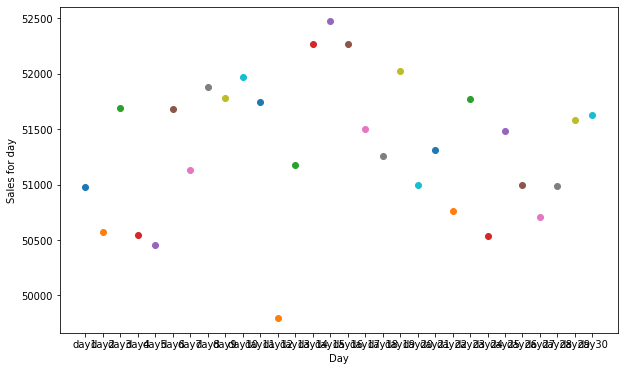

In [104]:
plt.figure(figsize=(10, 6))
for col in df.iloc[:, 3:].columns:
    plt.scatter(col, df.iloc[:, 3:][col].sum())
plt.xlabel("Day")
plt.ylabel("Sales for day")

### Task 7

იპოვეთ თვის განმავლობაში გაყიდული კონდენციონერების საშუალო, სტანდარტული გადახრა და ჩაწერეთ sheet3-ში.

In [119]:
all_sales = np.array(df.iloc[:, 3:]).flatten()
summary_data = {
    "mean": [np.mean(all_sales)],
    "std": [np.std(all_sales)]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_excel(writer, sheet_name="sheet3", index=False)
writer.save()
writer.close()

### Task 8

გამოთვალეთ 75%-იანი პროცენტილი ყველა კონდენციონერებისთვის გაყიდვების მიხედვით.

In [121]:
print(np.percentile(all_sales, 75))

37.0


### Task 9

დაადგინეთ შეიძლება თუ არა გამოყენებული იყოს წრფივი რეგრესიის მოდელი კონდენციონერის ფასსა და გაყიდვების რაოდენობის კავშირის დადგენისა და პროგნოზირებისთვის, ააგეთ შესაბამისი მოდელი ყველა კონდენციონერისთვის.

In [124]:
df["total_sales"] = df.iloc[:, 3:].sum(axis=1)

In [128]:
X = df["total_sales"].to_numpy().reshape(-1, 1)
y = df["price"].to_numpy().reshape(-1, 1)

reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [143]:
print(f"Coef: {reg_model.coef_}")
print(f"Cross val score: {cross_val_score(reg_model, X, y, cv=3)}")

Coef: [[-0.2169286]]
Cross val score: [-0.29260703  0.02857082  0.0729395 ]


In [139]:
print(f"Prediction: {reg_model.predict([X[0]])}")
print(f"Actual price: {y[0]}")

Prediction: [[2727.90108506]]
Actual price: [2048]


### Task 10

დავალება მეცხრე შეასრულეთ შემთხვევითად შერჩეული, რომელიმე ერთი დასახელების კონდენციონერისთვის.

In [135]:
random_conditioner = df[df.model == np.random.choice(df["model"])]
X2 = random_conditioner["total_sales"].to_numpy().reshape(-1, 1)
y2 = random_conditioner["price"].to_numpy().reshape(-1, 1)

reg_model2 = LinearRegression()
reg_model2.fit(X2, y2)

LinearRegression()

In [144]:
print(f"Coef: {reg_model2.coef_}")
print(f"Cross val score: {cross_val_score(reg_model2, X, y, cv=3)}")

Coef: [[-5.33195928]]
Cross val score: [-0.29260703  0.02857082  0.0729395 ]


In [140]:
print(f"Prediction: {reg_model.predict([X[1]])}")
print(f"Actual price: {y[1]}")

Prediction: [[2740.26601517]]
Actual price: [4094]
